In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(
    "C:\\Desktop\\3rd year ELC notes 6_sem\\OPEN LAB\\Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.shape

(2200, 8)

In [4]:
df.describe(include="all")

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

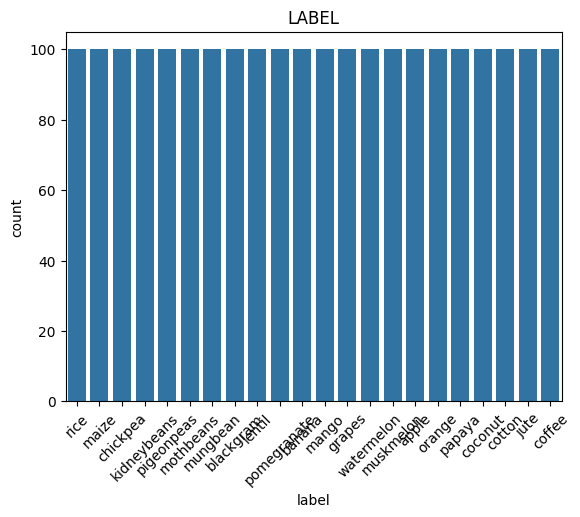

In [10]:
sns.countplot(x=df["label"])
plt.title("LABEL")
plt.xticks(rotation=45)
plt.show()

In [11]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

RELATION BETWEEN TEMPERATURE AND LABEL


<Axes: xlabel='temperature', ylabel='label'>

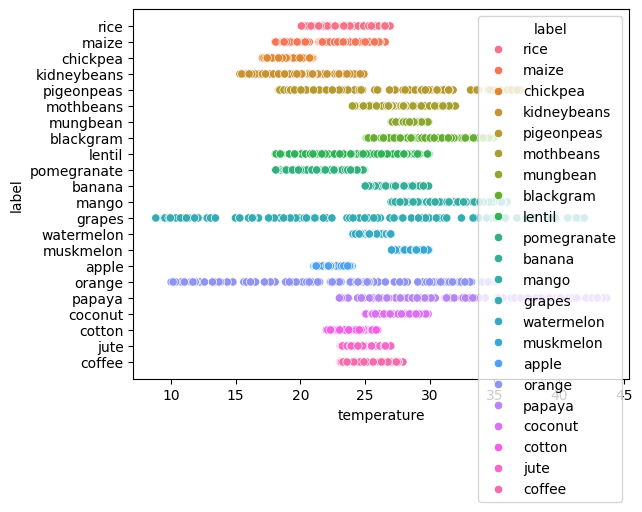

In [12]:
sns.scatterplot(x=df['temperature'], y=df['label'], hue=df['label'])

relation between humidity and label


<Axes: xlabel='humidity', ylabel='label'>

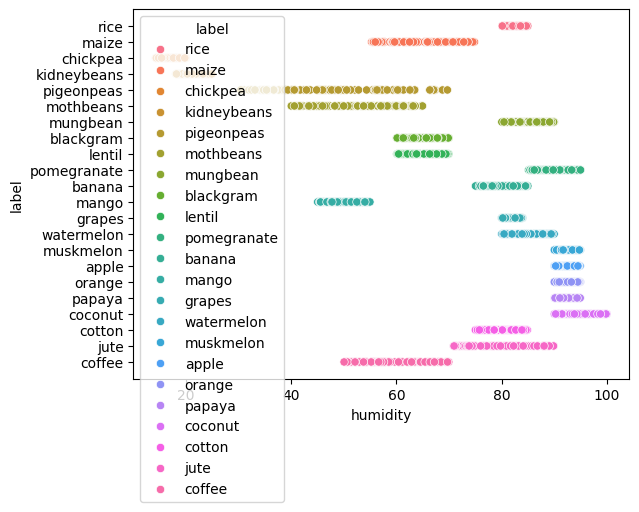

In [13]:
sns.scatterplot(x=df['humidity'], y=df['label'], hue=df['label'])

relation between ph and label


<Axes: xlabel='ph', ylabel='label'>

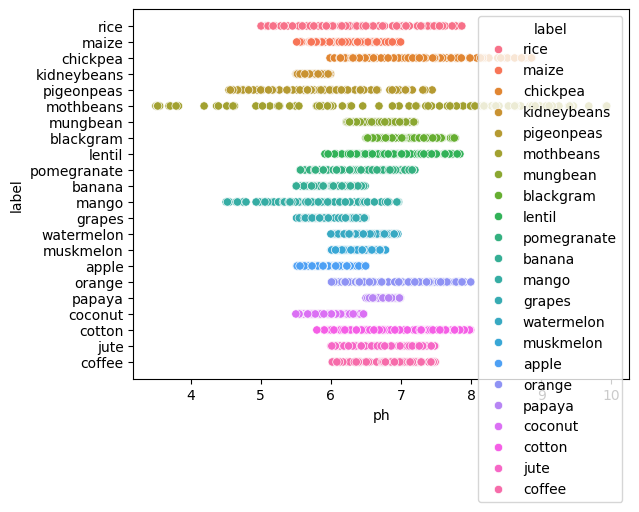

In [14]:
sns.scatterplot(x=df['ph'], y=df['label'], hue=df['label'])

relation between rainfall and label


<Axes: xlabel='rainfall', ylabel='label'>

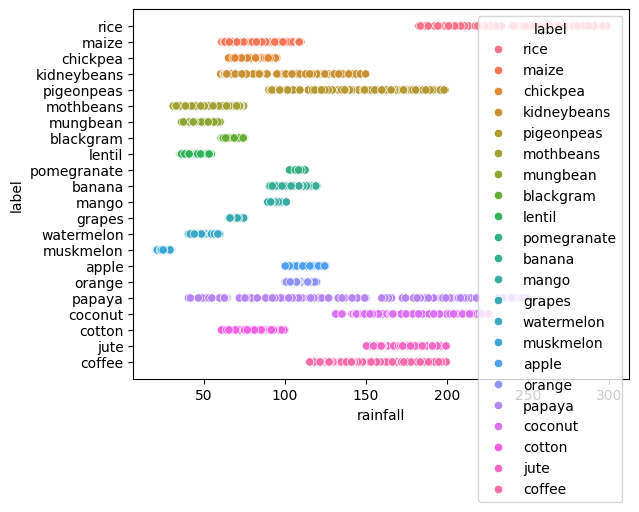

In [15]:
sns.scatterplot(x=df['rainfall'], y=df['label'], hue=df['label'])

In [16]:
from sklearn.preprocessing import MinMaxScaler
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

In [17]:
df1 = pd.DataFrame(df[features], columns=features)
print("Original Dataset:\n", df)
print("\nScaled Dataset:\n", df1)

Original Dataset:
              N         P      K  temperature  humidity        ph  rainfall  \
0     0.642857  0.264286  0.190     0.345886  0.790267  0.466264  0.656458   
1     0.607143  0.378571  0.180     0.371445  0.770633  0.549480  0.741675   
2     0.428571  0.357143  0.195     0.406854  0.793977  0.674219  0.875710   
3     0.528571  0.214286  0.175     0.506901  0.768751  0.540508  0.799905   
4     0.557143  0.264286  0.185     0.324378  0.785626  0.641291  0.871231   
...        ...       ...    ...          ...       ...       ...       ...   
2195  0.764286  0.207143  0.135     0.515037  0.608410  0.509353  0.566064   
2196  0.707143  0.071429  0.110     0.533473  0.494359  0.401561  0.386972   
2197  0.842857  0.200000  0.125     0.439202  0.617880  0.444433  0.550071   
2198  0.835714  0.192857  0.145     0.500627  0.441760  0.506045  0.384280   
2199  0.742857  0.092857  0.125     0.424029  0.538222  0.509317  0.433721   

       label  
0       rice  
1       rice  

In [18]:
df1.head()

,N,P,K,temperature,humidity,ph,rainfall
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231


In [19]:
x = df1
x.shape

(2200, 7)

In [20]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231


In [23]:
y = df.iloc[:, 7]
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [24]:
y.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

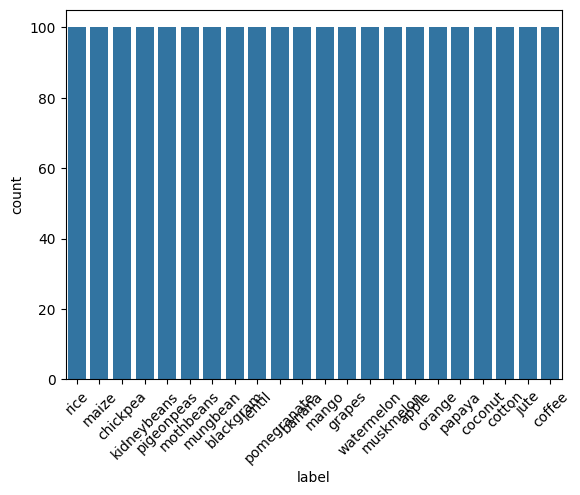

In [26]:
sns.countplot(x=y)
plt.xticks(rotation=45)
plt.show()

In [27]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
xo, yo = oversample.fit_resample(x, y)

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

In [28]:
y1 = pd.DataFrame(yo)
y1.value_counts()

label      
apple          100
banana         100
rice           100
pomegranate    100
pigeonpeas     100
papaya         100
orange         100
muskmelon      100
mungbean       100
mothbeans      100
mango          100
maize          100
lentil         100
kidneybeans    100
jute           100
grapes         100
cotton         100
coffee         100
coconut        100
chickpea       100
blackgram      100
watermelon     100
Name: count, dtype: int64

C:\Users\Aanatharaman\AppData\Local\Temp\ipykernel_6916\3972820162.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=yo, palette='muted')


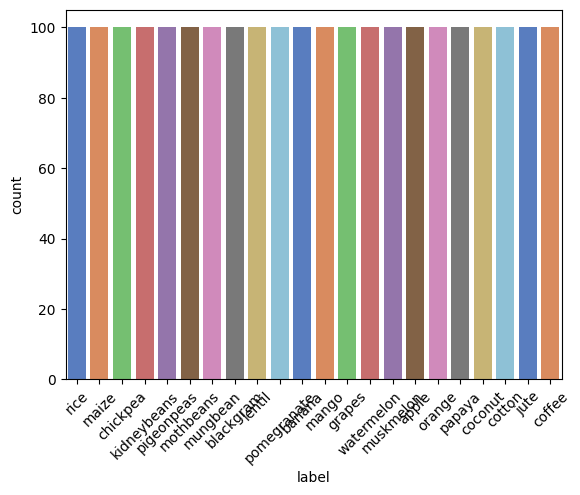

In [29]:
sns.countplot(x=yo, palette='muted')
plt.xticks(rotation=45)
plt.show()

In [30]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [31]:
x_train.head()

,N,P,K,temperature,humidity,ph,rainfall
1656,0.121429,0.078571,0.045,0.217234,0.909006,0.485322,0.297227
752,0.264286,0.528571,0.070,0.537110,0.642643,0.565941,0.176748
892,0.050000,0.485714,0.100,0.536479,0.570134,0.588352,0.089805
1041,0.721429,0.464286,0.215,0.474462,0.708950,0.390017,0.346119
1179,0.000000,0.085714,0.125,0.764684,0.393289,0.431452,0.278713


In [32]:
x_test.head()

,N,P,K,temperature,humidity,ph,rainfall
1451,0.721429,0.085714,0.210,0.593069,0.938733,0.416821,0.021904
1334,0.700000,0.021429,0.230,0.497956,0.842992,0.428373,0.104973
1761,0.421429,0.407143,0.220,0.990962,0.922659,0.534458,0.339742
1735,0.314286,0.392857,0.250,0.730414,0.890039,0.516399,0.281407
1576,0.214286,0.942857,0.975,0.404267,0.891779,0.326369,0.353489


In [33]:
y_train.head()

1656       orange
752     blackgram
892        lentil
1041       banana
1179        mango
Name: label, dtype: object

In [34]:
y_test.head()

1451     muskmelon
1334    watermelon
1761        papaya
1735        papaya
1576         apple
Name: label, dtype: object

K NEAREST NEGHIBOURS


In [35]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

KNeighborsClassifier()

In [36]:
y_KNN = KNN.predict(x_test)
y_KNN

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'jute',
       'pomegranate', 'lentil', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'lentil',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya', 'blackgram',
       'orange', 'rice', 'muskmelon', 'pigeonpeas', 'muskmelon',
       'coconut', 'jute', 'banana', 'blackgram', 'papaya', 'banana',
       'cotton', 'watermelon', 'orange', 'coffee', 'chickpea', 'r

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 21  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

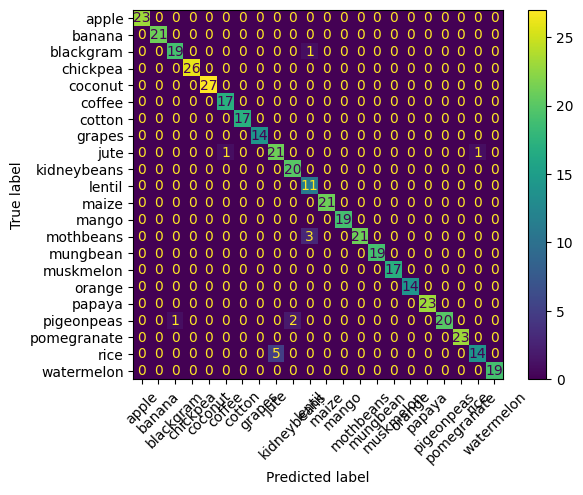

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
matrix_KNN = confusion_matrix(y_test, y_KNN)
print(matrix_KNN, '\n')
print(ConfusionMatrixDisplay.from_predictions(y_test, y_KNN))
accuracy_KNN = accuracy_score(y_test, y_KNN)
print(accuracy_KNN, '\n')
report_KNN = classification_report(y_test, y_KNN)
print(report_KNN)
plt.xticks(rotation=45)
plt.show()

In [38]:
KNN.score(x_test, y_test)

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

0.9681818181818181

LOGISTIC REGRESSION


In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

LogisticRegression()

In [40]:
y_LR = lr.predict(x_test)
y_LR

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'rice', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'mothbeans', 'rice', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'rice', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'lentil',
       'watermelon', 'coconut', 'lentil', 'orange', 'mungbean',
       'blackgram', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'rice', 'banana', 'blackgram', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickpea',
 

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 16  0  0  0  0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0 10 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

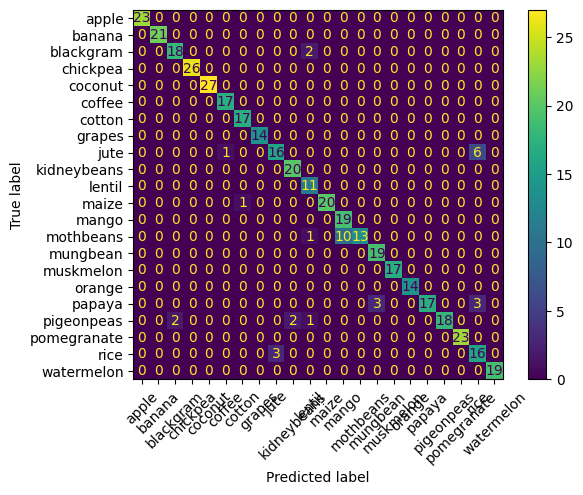

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
matrix_LR = confusion_matrix(y_test, y_LR)
print(matrix_LR, '\n')
print(ConfusionMatrixDisplay.from_predictions(y_test, y_LR))
accuracy_LR = accuracy_score(y_test, y_LR)
print(accuracy_LR, '\n')
report_LR = classification_report(y_test, y_LR)
print(report_LR)
plt.xticks(rotation=45)
plt.show()

In [42]:
lr.score(x_test, y_test)

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

0.9204545454545454

DECISION TREE


In [44]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(x_train, y_train)

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

DecisionTreeClassifier(criterion='entropy')

In [45]:
y_DT = DT.predict(x_test)
y_DT

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'jute',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
       'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickp

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

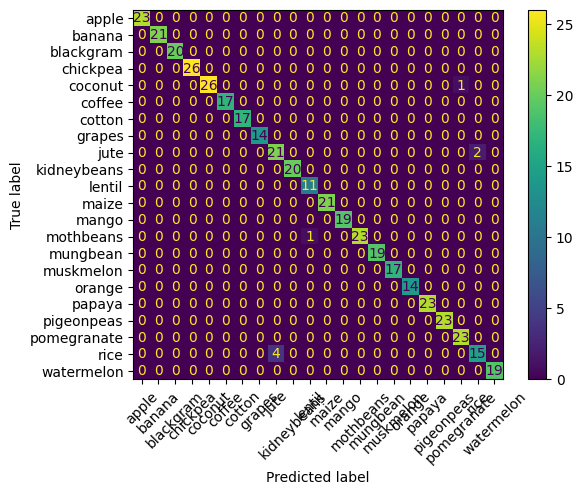

In [60]:
matrix_DT = confusion_matrix(y_test, y_DT)
print(matrix_DT, '\n')
print(ConfusionMatrixDisplay.from_predictions(y_test, y_DT))
accuracy_DT = accuracy_score(y_test, y_DT)
print(accuracy_DT, '\n')
report_DT = classification_report(y_test, y_DT)
print(report_DT)
plt.xticks(rotation=45)
plt.show()

In [47]:
DT.score(x_test, y_test)

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

0.9818181818181818

RANDOM FOREST


In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

RandomForestClassifier()

In [49]:
y_rf = rf.predict(x_test)
y_rf

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
       'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickp

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

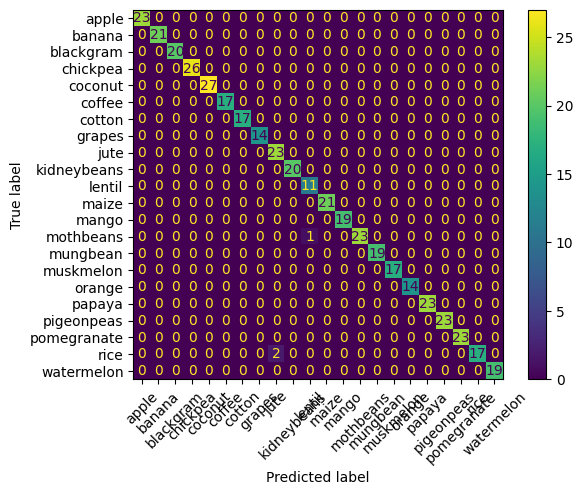

In [63]:
matrix_RF = confusion_matrix(y_test, y_rf)
print(matrix_RF, '\n')
print(ConfusionMatrixDisplay.from_predictions(y_test, y_rf))
accuracy_RF = accuracy_score(y_test, y_rf)
print(accuracy_RF, '\n')
report_RF = classification_report(y_test, y_rf)
print(report_RF)
plt.xticks(rotation=45)
plt.show()

In [51]:
rf.score(x_test, y_test)

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

0.9931818181818182

SUPPORT VECTOR MACHINES


In [52]:
from sklearn.svm import SVC
SVM = SVC(kernel='poly')
SVM.fit(x_train, y_train)

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

SVC(kernel='poly')

In [53]:
y_SVM = SVM.predict(x_test)
y_SVM

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'lentil',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya', 'blackgram',
       'orange', 'rice', 'muskmelon', 'pigeonpeas', 'muskmelon',
       'coconut', 'jute', 'banana', 'blackgram', 'papaya', 'banana',
       'cotton', 'watermelon', 'orange', 'coffee', 'chickpea',

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  1  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

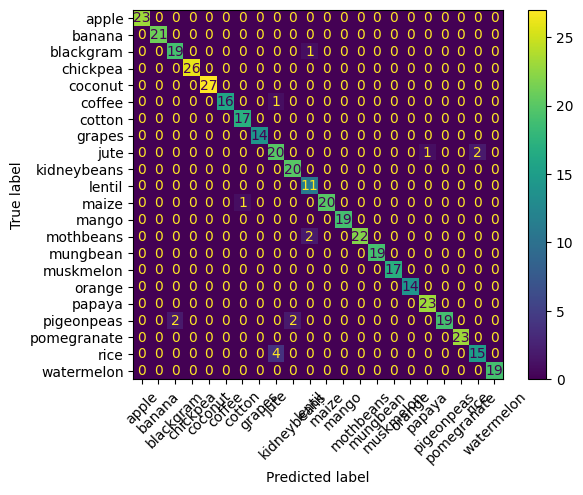

In [64]:
matrix_SVM = confusion_matrix(y_test, y_SVM)
print(matrix_SVM, '\n')
print(ConfusionMatrixDisplay.from_predictions(y_test, y_SVM))
accuracy_SVM = accuracy_score(y_test, y_SVM)
print(accuracy_SVM, '\n')
report_SVM = classification_report(y_test, y_SVM)
print(report_SVM)
plt.xticks(rotation=45)
plt.show()

In [55]:
SVM.score(x_test, y_test)

C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Aanatharaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

0.9636363636363636

In [56]:

algo = ['KNEARESTNEIGHBOUR', 'LOGISTIC REGRESSION',
        'DECISION TREE', 'RANDOM FOREST', 'SUPPORT VECTOR MACHINES']
acc = [accuracy_KNN, accuracy_LR, accuracy_DT, accuracy_RF, accuracy_SVM]
Accuracy_Scores = pd.DataFrame({'Algorithms': algo, 'Accuracy': acc})
Accuracy_Scores['Accuracy'] = Accuracy_Scores['Accuracy']*100
Accuracy_Scores

,Algorithms,Accuracy
0,KNEARESTNEIGHBOUR,96.818182
1,LOGISTIC REGRESSION,92.045455
2,DECISION TREE,98.181818
3,RANDOM FOREST,99.318182
4,SUPPORT VECTOR MACHINES,96.363636


In [57]:
Accuracy_Scores.sort_values(by='Accuracy', ascending=False)

,Algorithms,Accuracy
3,RANDOM FOREST,99.318182
2,DECISION TREE,98.181818
0,KNEARESTNEIGHBOUR,96.818182
4,SUPPORT VECTOR MACHINES,96.363636
1,LOGISTIC REGRESSION,92.045455
